In [1]:
import numpy as np
import pandas as pd

In [3]:
dfo = pd.read_csv('../data/extracted_data.csv')
dfo.head()

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2019
0,2020-03-20,1,0,1,0,Chad,TD,TCD,15946882.0
1,2020-03-21,0,0,1,0,Chad,TD,TCD,15946882.0
2,2020-03-22,1,0,2,0,Chad,TD,TCD,15946882.0
3,2020-03-23,0,0,2,0,Chad,TD,TCD,15946882.0
4,2020-03-24,0,0,2,0,Chad,TD,TCD,15946882.0


In [4]:
df = dfo[dfo['geo_id']=='CZ'][['date', 'daily_confirmed_cases']]\
  .copy()\
  .sort_values(by=['date'])\
  .reset_index(drop=True)
df.rename(columns={"date": "ds", "daily_confirmed_cases": "y"}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

df.head()

,ds,y
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0


<AxesSubplot:xlabel='ds'>

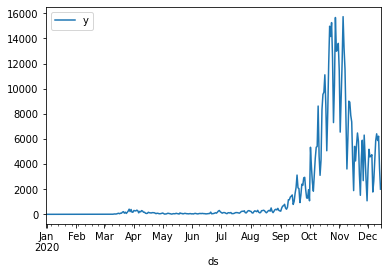

In [5]:
df.plot.line(x='ds', y='y')

In [6]:
df = df[df['ds']>='2020-09-01']  # It looks like it's almost no cases before the September
df

,ds,y
245,2020-09-01,251
246,2020-09-02,499
247,2020-09-03,656
248,2020-09-04,679
249,2020-09-05,797
...,...,...
345,2020-12-10,6406
346,2020-12-11,5872
347,2020-12-12,6217
348,2020-12-13,3657


In [17]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 813 kB/s            


In [83]:
10

10

In [105]:
df.set_index('ds').asfreq('d')['y']

ds
2020-09-01     251
2020-09-02     499
2020-09-03     656
2020-09-04     679
2020-09-05     797
              ... 
2020-12-10    6406
2020-12-11    5872
2020-12-12    6217
2020-12-13    3657
2020-12-14    2000
Freq: D, Name: y, Length: 105, dtype: int64

In [108]:
df.set_index('ds').asfreq('d').index

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10',
               ...
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14'],
              dtype='datetime64[ns]', name='ds', length=105, freq='D')

In [110]:
from datetime import date
pd.DatetimeIndex(pd.date_range(date(2020, 12, 15), periods=17, freq='D'))

DatetimeIndex(['2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='D')

In [116]:
pd.DatetimeIndex(pd.date_range(date(2020, 12, 15), periods=17, freq='D'))[0]

Timestamp('2020-12-15 00:00:00', freq='D')

In [118]:
df.set_index('ds').asfreq('d').index[0]

Timestamp('2020-09-01 00:00:00', freq='D')

In [117]:
assert isinstance(df.set_index('ds').asfreq('d').index, pd.Timestamp)

AssertionError: 

In [100]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

y = df.set_index('ds').asfreq('d')['y']
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
# forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster = AutoARIMA(sp=10)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/nikolai/dataviz/venv/lib/python3.7/site-pack

/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/nikolai/dataviz/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWar

In [101]:
mean_absolute_percentage_error(y_test, y_pred)

0.22182514845910362

In [102]:
y_train

2020-09-01     251
2020-09-02     499
2020-09-03     656
2020-09-04     679
2020-09-05     797
              ... 
2020-11-13    7870
2020-11-14    7355
2020-11-15    4199
2020-11-16    1887
2020-11-17    5407
Freq: D, Name: y, Length: 78, dtype: int64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='y'>)

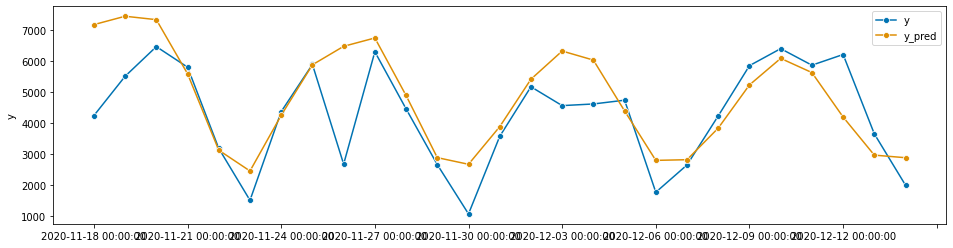

In [103]:
from sktime.utils.plotting import plot_series
plot_series(y_test, y_pred, labels=["y", "y_pred"])
